## E Commerce Data Analysis

In [40]:
import pandas as pd
import plotly.express as px #For data visualization
import plotly.graph_objects as go #For advanced and customize graphs  
import plotly.io as pio #For graph templates.
pio.templates.default = "plotly_white" #Setting template color as white

In [41]:
df = pd.read_csv(r"E:\E Commerce Data Analysis\Files\Sample - Superstore.csv", encoding='latin1', engine='python')

In [42]:
df.head() #Top 5 entries

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
df.describe() #generating descriptive statistics for numerical and categorical columns in df.

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [44]:
df.info() #Gathering info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [45]:
df.columns #Checking columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [46]:
df.dtypes #Checking Data types of each column.

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

<Axes: >

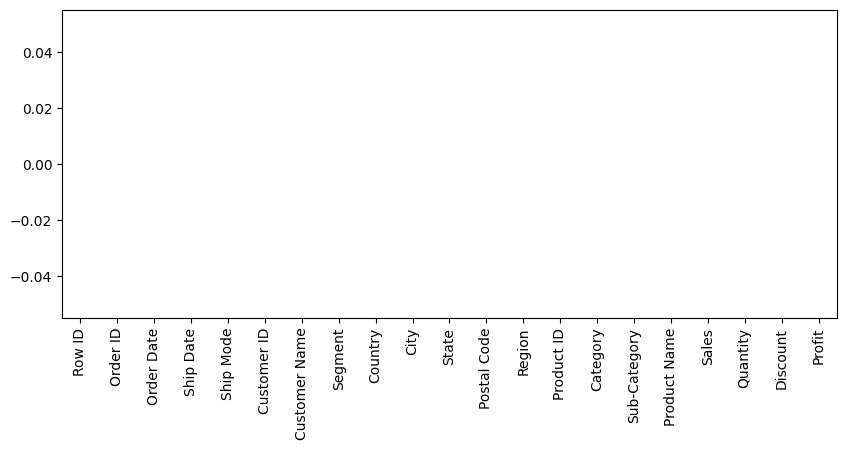

In [47]:
#Checking for any missing values
df.isnull().sum().plot(kind="bar", figsize=(10,4))
# if we have missing data in column it will be shown in the bar chart, if there is no missing data, the bar chart will be empty.

Converting date columns into date-time format

(object time to date-time format)

In [48]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [50]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [51]:
#Creating three new columns for weekly, monthy and yearly sales record
df["Order Month"] = df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year
df["Order Day of week"] = df["Order Date"].dt.dayofweek

In [52]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


Q1: Calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.

In [53]:
#Monthly Sales Analysis
monthly_sales = df.groupby("Order Month")["Sales"].sum().reset_index()
fig = px.line(monthly_sales, x="Order Month", y="Sales", title="Monthly Sales Analysis", markers=True, color_discrete_sequence=["purple"])
fig.show()

In [54]:
#via a Bar Chart
monthly_sales = df.groupby("Order Month")["Sales"].sum().reset_index()
fig =px.bar(monthly_sales, x="Order Month", y="Sales", title="Monthly Sales", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

Conclusion: Novemeber month had the highest sales (352.461k) & the lowest sales (59.75125k) was in February.

Q2: Analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

In [55]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [56]:
category_sales = df["Category"].value_counts()
print(category_sales) #Checking how many time they appear

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [57]:
#By the help of a diagram 
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
fig = px.bar(category_sales, x="Category", y="Sales", title="Sales by Category", color_discrete_sequence=["Orange"])
fig.show()

In [58]:
#We can even draw a pie chart for it too.
fig = px.pie(category_sales, values='Sales', names='Category', hole=0.4, color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.update_layout(title_text="Sales Analysis By Category", title_font=dict(size=20))
fig.show()

Conclusion: Highest sales Technology(836.154k) then Furniture(741.9998k) followed by Office Supplie(719.047k).

Q3: Find the Sales analysis needs to done based on sub-categories. And also find top 3 sales sub catgeories.

In [59]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [60]:
subcategory_sales = df["Sub-Category"].value_counts()
print(subcategory_sales) #Cheking values

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [61]:
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().reset_index()
fig = px.bar(subcategory_sales, x="Sub-Category", y="Sales", title="Sales by Sub-Category", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [62]:
#Via a Scatter Plot
fig = px.scatter(subcategory_sales, x="Sub-Category", y="Sales", title="Sales by Sub-Category", 
                 color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_layout(xaxis_title="Sub-Category", yaxis_title="Sales", title_font=dict(size=20))
fig.show()


Conclusion: Top sub category Phones(330.0071k) followed by Chairs(328.4491k) and then Storage(223.8436k).

Q4: Analyze the monthly profit from sales and determine which month had the highest profit.

In [63]:
#Analyzing monthly profit
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1


In [64]:
sales_month = df.groupby("Order Month")["Profit"].sum().reset_index()
sales_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


In [65]:
fig = px.bar(sales_month, x="Order Month", y="Profit", title="Monthly Profit", color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

In [66]:
#Another graph to make this, Via a Line graph
sales_month = df.groupby("Order Month")["Profit"].sum().reset_index()
fig = px.line(sales_month, x="Order Month", y="Profit", title="Monthly Sales", markers=True, color_discrete_sequence=["Green"])
fig.show()

Conclusion: Highest Profit was in December(43.36919k), While Lowest was in January(9,134.446k)

Q5: Analyze the profit by category and sub-category.

In [67]:
category_profit = df.groupby("Category")["Profit"].sum().reset_index()
category_profit

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [68]:
#Via a pie chart
category_profit = df.groupby("Category")["Profit"].sum().reset_index()
fig =px.pie(category_profit, values="Profit", names="Category", color_discrete_sequence= px.colors.qualitative.Dark24)
fig.update_traces(textposition="inside", textinfo="percent+label", hole=0.4)
fig.update_layout(title_text="Profit by category", title_font=dict(size=22))
fig.show()

In [69]:
#Now for Sub-Category
subcategory_profit = df.groupby("Sub-Category")["Profit"].sum().reset_index()
subcategory_profit

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


In [70]:
#Via a Scatter Plot
fig = px.scatter(subcategory_profit, x="Sub-Category", y="Profit", color="Sub-Category", color_discrete_sequence=px.colors.qualitative.Vivid,title="Profit by Sub-Category")
fig.update_layout(title_font=dict(size=20), xaxis_title="Sub-Category", yaxis_title="Profit")
fig.show()

In [71]:
#via a histogram
fig = px.histogram(subcategory_profit, x ="Sub-Category", y ="Profit", color="Sub-Category", 
                   color_discrete_sequence=px.colors.qualitative.Dark24, title="Profit by Sub Category")
fig.update_layout(xaxis_title="Sub-Category", yaxis_title="Profit", bargap=0.2, showlegend=True, title_font = dict(size=20))
fig.show()


Conclusion: For Category Highest profit is Technology(145,454.9841k), While for Sub Category Highest profit is Copiers(55.61782k).

Q6: Analyze the sales and profit by customer segment.

In [72]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1


In [73]:
#Using go.Figure()
salesprofit_segment = df.groupby("Segment").agg({"Sales": "sum", "Profit": "sum"}).reset_index()
color_discrete_sequence=px.colors.qualitative.Dark24
fig = go.Figure()
fig.add_trace(go.Bar(x=salesprofit_segment["Segment"], y=salesprofit_segment["Sales"], name="Sales", marker_color=color_discrete_sequence[1]))

fig.add_trace(go.Bar(x=salesprofit_segment["Segment"], y=salesprofit_segment["Profit"], name="Profit", marker_color=color_discrete_sequence[2]))

fig.update_layout(title="Sales and Profit by Customer Segment", xaxis_title="Customer Segment", yaxis_title="Amount")
fig.show()

In [74]:
#Via a line chart too
fig = px.line(
    salesprofit_segment,x="Segment",y=["Sales", "Profit"],title="Sales and Profit by Customer Segment",labels={"value": "Amount", "variable": ""}, 
    color_discrete_sequence=px.colors.qualitative.Dark24,markers=True)

fig.update_layout(xaxis_title="Customer Segment",yaxis_title="Amount",hovermode="x unified", legend_title_text=None)

fig.show()

Conclusion: Most profit and sales is generated by Consumer Sales(1.161491M) while Profit(134.1192k)

Q7: Analyze the sales to profit ratio.

In [75]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1


In [76]:
salesprofit_segment = df.groupby("Segment").agg({"Sales": "sum", "Profit": "sum"}).reset_index()
salesprofit_segment["Sales Profit Ratio"] = salesprofit_segment["Sales"] / salesprofit_segment["Profit"]
print(salesprofit_segment[["Segment", "Sales Profit Ratio"]])

       Segment  Sales Profit Ratio
0     Consumer            8.659471
1    Corporate            7.677245
2  Home Office            7.125416


In [77]:
# Creating line chart
fig = px.line(
    salesprofit_segment,x="Segment",y="Sales Profit Ratio", title="Sales-Profit Ratio",labels={"Sales Profit Ratio": "Sales/Profit Ratio"},
    markers=True,text="Sales Profit Ratio")

fig.update_traces(
    texttemplate='%{text:.2f}', textposition='top center',line=dict(width=3),marker=dict(size=10))

fig.update_layout(
    xaxis_title="Customer Segment",yaxis_title="Ratio (Sales/Profit)",hovermode="x",yaxis_tickformat=".2f")

fig.show()

In [78]:
# Creating bar chart
fig = px.bar(salesprofit_segment,x="Segment",y="Sales Profit Ratio",title="Sales-Profit Ratio",labels={"Sales Profit Ratio": "Sales/Profit Ratio"},
    color="Segment",color_discrete_sequence=px.colors.qualitative.Pastel,text="Sales Profit Ratio")

fig.update_traces(
    texttemplate='%{text:.2f}',textposition='outside',marker_line_color='black',marker_line_width=2)

fig.update_layout(
    xaxis_title="Customer Segment",yaxis_title="Ratio (Sales/Profit)",yaxis_tickformat=".2f",uniformtext_minsize=8,showlegend=False)

fig.show()

Conclusion: Highest Sales/Profit ratio is of Consumer followed by Corporate then Home Office.

Q8: Find top 10 Sub-Categories by sales

In [84]:
#Via a bar chart
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(subcat_sales, x='Sub-Category', y='Sales', title='Top 10 Sub-Categories by Sales',color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

In [86]:
#Via a Scatter Plot
fig = px.scatter(subcat_sales, x="Sub-Category", y="Sales", color="Sub-Category", color_discrete_sequence=px.colors.qualitative.Vivid,title="Top 10 Sub-Category by Sales")
fig.update_layout(title_font=dict(size=20), xaxis_title="Sub-Category", yaxis_title="Sales")
fig.show()